In [2]:
import pandas as pd
import numpy as np

# Đường dẫn file bạn đã upload vào hệ thống
CSV_PATH = "E:/AirlineDataset.csv"

# Đọc file CSV
df = pd.read_csv(CSV_PATH)
print("Số dòng:", len(df))
print("=== BƯỚC 1: THU THẬP DỮ LIỆU ===")
print("Các cột:", df.columns.tolist())
print(df.head())

Số dòng: 2512
=== BƯỚC 1: THU THẬP DỮ LIỆU ===
Các cột: ['Airline Name', 'Overall_Rating', 'Review_Title', 'Review Date', 'Verified', 'Review', 'Aircraft', 'Type Of Traveller', 'Seat Type', 'Route', 'Date Flown', 'Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Ground Service', 'Inflight Entertainment', 'Wifi & Connectivity', 'Value For Money', 'Recommended']
    Airline Name Overall_Rating                           Review_Title  \
0    AB Aviation              9                "pretty decent airline"   
1    AB Aviation              1                   "Not a good airline"   
2    AB Aviation              1         "flight was fortunately short"   
3  Adria Airways              1    "I will never fly again with Adria"   
4  Adria Airways              1  "it ruined our last days of holidays"   

           Review Date Verified  \
0   11th November 2019     True   
1       25th June 2019     True   
2       25th June 2019     True   
3  28th September 2019    False   
4  24th

In [17]:
import random
import pandas as pd

# --- 1. Load file gốc ---
df_original = pd.read_csv("E:/AirlineDataset.csv")

# --- 2. Tạo dữ liệu mới (ví dụ 2000 dòng) ---

airlines = ["AB Aviation", "SkyComoros", "FlyComoros"]
routes = [
    "Moroni to Moheli",
    "Moroni to Anjouan",
    "Anjouan to Dzaoudzi",
    "Moheli to Moroni",
    "Moroni to Mutsamudu"
]

positive_templates = [
    "Smooth flight from {route}. Staff were friendly, clean aircraft, overall pleasant.",
    "Good short flight on {route}. On time and professional crew.",
    "Pretty good experience flying {route}. Quick boarding, helpful staff."
]

negative_templates = [
    "Flight from {route} was delayed with poor communication. Not satisfied.",
    "Disorganized check-in for {route}. Staff seemed confused, slow boarding.",
    "Bad experience on {route}. Delay, messy check-in, would not recommend."
]

new_rows = []

for i in range(2000):  # muốn tạo bao nhiêu dòng thì sửa số này
    route = random.choice(routes)
    sentiment = random.choice(["pos", "neg"])
    
    if sentiment == "pos":
        review = random.choice(positive_templates).format(route=route)
        rating = random.randint(7, 10)
        recommended = "yes"
    else:
        review = random.choice(negative_templates).format(route=route)
        rating = random.randint(1, 3)
        recommended = "no"
    
    new_rows.append({
        "Airline Name": random.choice(airlines),
        "Overall_Rating": rating,
        "Review_Title": review[:25],
        "Review": review,
        "Route": route,
        "Recommended": recommended
    })

df_new = pd.DataFrame(new_rows)

# --- 3. Gộp dữ liệu cũ + mới ---
df_final = pd.concat([df_original, df_new], ignore_index=True)

# --- 4. Ghi đè trở lại file gốc ---
df_final.to_csv("E:/AirlineDataset.csv", index=False)

print("Đã thêm dữ liệu mới vào E:/AirlineDataset.csv")
print("Tổng số dòng mới:", len(df_final))


Đã thêm dữ liệu mới vào E:/AirlineDataset.csv
Tổng số dòng mới: 2512


In [3]:
print("\n=== BƯỚC 2: TIỀN XỬ LÝ DỮ LIỆU ===")

TEXT_COL = "Review"
LABEL_COL = "Overall_Rating"

# --- 2.3: Convert nhãn về dạng số ---
df[LABEL_COL] = pd.to_numeric(df[LABEL_COL], errors="coerce")

# --- 2.4: Bỏ các giá trị nhãn lỗi ---
df = df.dropna(subset=[LABEL_COL]).copy()   # ← thêm .copy() rất quan trọng

# --- 2.5: Binarize nhãn ---
median_rating = df[LABEL_COL].median()
print("Median rating:", median_rating)

df.loc[:, "label"] = (df[LABEL_COL] >= median_rating).astype(int)

# --- 2.6: Kiểm tra lại phân bố nhãn ---
print("Phân bố nhãn sau khi chuyển 0/1:")
print(df["label"].value_counts())

# --- 2.7: Loại các hàng không có review ---
df = df.dropna(subset=[TEXT_COL]).copy()

# --- 2.8: In ví dụ ---
print("\nVí dụ dữ liệu đã xử lý:")
print(df[[TEXT_COL, "label"]].head())



=== BƯỚC 2: TIỀN XỬ LÝ DỮ LIỆU ===
Median rating: 3.0
Phân bố nhãn sau khi chuyển 0/1:
label
1    1548
0     946
Name: count, dtype: int64

Ví dụ dữ liệu đã xử lý:
                                              Review  label
0   Moroni to Moheli. Turned out to be a pretty d...      1
1  Moroni to Anjouan. It is a very small airline....      0
2   Anjouan to Dzaoudzi. A very small airline and...      0
3   Please do a favor yourself and do not fly wit...      0
4  Do not book a flight with this airline! My fri...      0


In [4]:
# ============================================
# BƯỚC 3 – CHIA TẬP DỮ LIỆU (TRAIN / TEST)
# ============================================
from sklearn.model_selection import train_test_split

print("\n=== BƯỚC 3: CHIA TẬP DỮ LIỆU ===")

# TEXT_COL và LABEL_COL đã được xác định ở bước trước
X = df[TEXT_COL]        # dữ liệu văn bản
y = df["label"]         # nhãn 0/1 đã được xử lý

# Chia 80% train – 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y        # đảm bảo phân bố nhãn cân bằng
)

print("Số mẫu train:", len(X_train))
print("Số mẫu test :", len(X_test))

print("\nVí dụ 5 mẫu TRAIN:")
print(X_train.head())

print("\nVí dụ 5 mẫu TEST:")
print(X_test.head())



=== BƯỚC 3: CHIA TẬP DỮ LIỆU ===
Số mẫu train: 1995
Số mẫu test : 499

Ví dụ 5 mẫu TRAIN:
1103    Smooth flight from Anjouan to Dzaoudzi. Staff ...
540     Smooth flight from Moroni to Mutsamudu. Staff ...
1148    Smooth flight from Moheli to Moroni. Staff wer...
720     Bad experience on Moheli to Moroni. Delay, mes...
1114    Pretty good experience flying Moroni to Moheli...
Name: Review, dtype: object

Ví dụ 5 mẫu TEST:
448     Flew with this airline three times domesticall...
46      WAW-SKJ Economy. No free snacks or drinks on t...
74      London to Tirana via Ljubljana Economy Class. ...
1998    Disorganized check-in for Moheli to Moroni. St...
1804    Disorganized check-in for Moheli to Moroni. St...
Name: Review, dtype: object


In [5]:
# ======================================================
# BƯỚC 4 – ÁP DỤNG LOGISTIC REGRESSION + TF-IDF
# ======================================================
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
print("\n=== BƯỚC 4: LOGISTIC REGRESSION + TF-IDF ===")
# ------------------------------------------------------
# 4.1 Chuyển đổi văn bản → TF-IDF
# ------------------------------------------------------
# TF-IDF: Term Frequency – Inverse Document Frequency 
# Chuyển văn bản thành ma trận số dạng (số mẫu × số đặc trưng)

tfidf = TfidfVectorizer(
    max_features=5000,        # số từ đặc trưng
    stop_words='english',     # loại bỏ stop words
    ngram_range=(1,2)         # sử dụng cả unigram và bigram
)
# Fit trên tập train và transform cả train/test
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf  = tfidf.transform(X_test)

print("Kích thước TF-IDF train:", X_train_tfidf.shape)
print("Kích thước TF-IDF test :", X_test_tfidf.shape)
# ------------------------------------------------------
# 4.2 Huấn luyện mô hình Logistic Regression
# ------------------------------------------------------
# Logistic Regression cho bài toán nhị phân:
# sử dụng hàm mất mát Binary Cross–Entropy (log loss)
log_reg = LogisticRegression(
    max_iter=200,
    solver='liblinear'  # phù hợp dữ liệu sparse như TF-IDF
)
log_reg.fit(X_train_tfidf, y_train)
# ------------------------------------------------------
# 4.3 Dự đoán trên tập test
# ------------------------------------------------------
y_pred_tfidf = log_reg.predict(X_test_tfidf)
# ------------------------------------------------------
# 4.4 Đánh giá mô hình
# ------------------------------------------------------
accuracy = accuracy_score(y_test, y_pred_tfidf)

print("\n=== KẾT QUẢ LOGISTIC REGRESSION + TF-IDF ===")
print("Độ chính xác (Accuracy):", accuracy)

# precision / recall / f1 score
print("\nBáo cáo phân loại:")
print(classification_report(y_test, y_pred_tfidf, digits=4))



=== BƯỚC 4: LOGISTIC REGRESSION + TF-IDF ===
Kích thước TF-IDF train: (1995, 5000)
Kích thước TF-IDF test : (499, 5000)

=== KẾT QUẢ LOGISTIC REGRESSION + TF-IDF ===
Độ chính xác (Accuracy): 0.8056112224448898

Báo cáo phân loại:
              precision    recall  f1-score   support

           0     0.6811    0.9153    0.7810       189
           1     0.9347    0.7387    0.8252       310

    accuracy                         0.8056       499
   macro avg     0.8079    0.8270    0.8031       499
weighted avg     0.8386    0.8056    0.8085       499



In [6]:
# ======================================================
# BƯỚC 4 – LOGISTIC REGRESSION + WORD2VEC
# ======================================================
import gensim
from gensim.models import Word2Vec
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
print("\n=== BƯỚC 4: LOGISTIC REGRESSION + WORD2VEC ===")
# ------------------------------------------------------
# 4.1 Tokenize dữ liệu (Word2Vec yêu cầu token list)
# ------------------------------------------------------
def tokenize(text):
    return text.lower().split()

X_train_tokens = X_train.apply(tokenize)
X_test_tokens  = X_test.apply(tokenize)
# ------------------------------------------------------
# 4.2 Huấn luyện Word2Vec trên tập train
# ------------------------------------------------------
word2vec_model = Word2Vec(
    sentences=X_train_tokens,
    vector_size=100,
    window=5,
    min_count=2,
    workers=4
)
word2vec_model.train(
    X_train_tokens,
    total_examples=len(X_train_tokens),
    epochs=10
)
print("Số lượng từ học được:", len(word2vec_model.wv))
# ------------------------------------------------------
# 4.3 Hàm chuyển câu thành vector (mean pooling)
# ------------------------------------------------------
def sentence_vector(tokens, model, vector_size=100):
    vectors = [model.wv[word] for word in tokens if word in model.wv]
    if len(vectors) == 0:
        return np.zeros(vector_size)
    return np.mean(vectors, axis=0)

X_train_vec = np.array([sentence_vector(tokens, word2vec_model) for tokens in X_train_tokens])
X_test_vec  = np.array([sentence_vector(tokens, word2vec_model) for tokens in X_test_tokens])
# ------------------------------------------------------
# 4.4 Chuẩn hóa dữ liệu
# ------------------------------------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_vec)
X_test_scaled  = scaler.transform(X_test_vec)
# ------------------------------------------------------
# 4.5 Huấn luyện Logistic Regression
# ------------------------------------------------------
log_reg_w2v = LogisticRegression(max_iter=300)
log_reg_w2v.fit(X_train_scaled, y_train)
# ------------------------------------------------------
# 4.6 Dự đoán
# ------------------------------------------------------
y_pred_w2v = log_reg_w2v.predict(X_test_scaled)
# ------------------------------------------------------
# 4.7 Đánh giá mô hình
# ------------------------------------------------------
print("\n=== KẾT QUẢ LOGISTIC REGRESSION + WORD2VEC ===")
print("Độ chính xác (Accuracy):", accuracy_score(y_test, y_pred_w2v))

print("\nBáo cáo phân loại:")
print(classification_report(y_test, y_pred_w2v, digits=4))


=== BƯỚC 4: LOGISTIC REGRESSION + WORD2VEC ===
Số lượng từ học được: 3098

=== KẾT QUẢ LOGISTIC REGRESSION + WORD2VEC ===
Độ chính xác (Accuracy): 0.8036072144288577

Báo cáo phân loại:
              precision    recall  f1-score   support

           0     0.6813    0.9048    0.7773       189
           1     0.9274    0.7419    0.8244       310

    accuracy                         0.8036       499
   macro avg     0.8043    0.8233    0.8008       499
weighted avg     0.8342    0.8036    0.8065       499



In [7]:
# ======================================================
# BƯỚC 5 – RNN (LSTM) + WORD2VEC
# ======================================================
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from gensim.models import Word2Vec
from sklearn.metrics import accuracy_score, classification_report
print("\n=== BƯỚC 5: RNN (LSTM) + WORD2VEC ===")
# ------------------------------------------------------
# 5.1 Tokenize lại dữ liệu
# ------------------------------------------------------
def tokenize(text):
    return text.lower().split()
X_train_tokens = X_train.apply(tokenize)
X_test_tokens  = X_test.apply(tokenize)
# ------------------------------------------------------
# 5.2 Train Word2Vec
# ------------------------------------------------------
EMBEDDING_DIM = 100
w2v_model = Word2Vec(
    sentences=X_train_tokens,
    vector_size=EMBEDDING_DIM,
    window=5,
    min_count=2,
    workers=4
)
w2v_model.train(X_train_tokens, total_examples=len(X_train_tokens), epochs=10)

print("Từ vựng Word2Vec:", len(w2v_model.wv))


# ------------------------------------------------------
# 5.3 Chuyển câu thành chuỗi vector
# ------------------------------------------------------
def sentence_to_matrix(tokens):
    vectors = []
    for word in tokens:
        if word in w2v_model.wv:
            vectors.append(w2v_model.wv[word])
        else:
            vectors.append(np.zeros(EMBEDDING_DIM))
    return np.array(vectors)

X_train_seq = [sentence_to_matrix(tokens) for tokens in X_train_tokens]
X_test_seq  = [sentence_to_matrix(tokens) for tokens in X_test_tokens]


# ------------------------------------------------------
# 5.4 Padding cho RNN
# ------------------------------------------------------
def pad_sequences(seqs, max_len):
    padded = []
    for seq in seqs:
        if seq.shape[0] < max_len:
            pad_len = max_len - seq.shape[0]
            seq = np.vstack([seq, np.zeros((pad_len, EMBEDDING_DIM))])
        else:
            seq = seq[:max_len]
        padded.append(seq)
    return np.array(padded)

MAX_LEN = 100

X_train_pad = pad_sequences(X_train_seq, MAX_LEN)
X_test_pad  = pad_sequences(X_test_seq, MAX_LEN)


# ------------------------------------------------------
# 5.5 Dataset + DataLoader (PyTorch)
# ------------------------------------------------------
class ReviewDataset(Dataset):
    def __init__(self, X, y):
        self.X = torch.tensor(X, dtype=torch.float32)
        self.y = torch.tensor(y.values, dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_loader = DataLoader(ReviewDataset(X_train_pad, y_train), batch_size=32, shuffle=True)
test_loader  = DataLoader(ReviewDataset(X_test_pad, y_test), batch_size=32)


# ------------------------------------------------------
# 5.6 Xây dựng mô hình LSTM
# ------------------------------------------------------
class LSTMClassifier(nn.Module):
    def __init__(self, embedding_dim, hidden_dim):
        super().__init__()
        self.lstm = nn.LSTM(
            input_size=embedding_dim,
            hidden_size=hidden_dim,
            batch_first=True
        )
        self.fc = nn.Linear(hidden_dim, 1)
        self.sigmoid = nn.Sigmoid()
    def forward(self, x):
        _, (h_n, _) = self.lstm(x)
        out = self.fc(h_n[-1])
        return self.sigmoid(out)
model = LSTMClassifier(embedding_dim=EMBEDDING_DIM, hidden_dim=128)
criterion = nn.BCELoss()       # Binary Cross Entropy
optimizer = optim.Adam(model.parameters(), lr=0.001)
EPOCHS = 8
# ------------------------------------------------------
# 5.7 Huấn luyện mô hình
# ------------------------------------------------------
print("\n--- Training LSTM ---")
for epoch in range(EPOCHS):
    model.train()
    total_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model(X_batch).squeeze()
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    print(f"Epoch {epoch+1}/{EPOCHS} - Loss: {total_loss:.4f}")
# ------------------------------------------------------
# 5.8 Đánh giá mô hình
# ------------------------------------------------------
model.eval()
preds = []
labels = []
with torch.no_grad():
    for X_batch, y_batch in test_loader:
        y_pred = model(X_batch).squeeze()
        y_pred = (y_pred >= 0.5).int()
        preds.extend(y_pred.tolist())
        labels.extend(y_batch.tolist())
acc = accuracy_score(labels, preds)
print("\n=== KẾT QUẢ LSTM + WORD2VEC ===")
print("Accuracy:", acc)
print("\nBáo cáo phân loại:")
print(classification_report(labels, preds, digits=4))



=== BƯỚC 5: RNN (LSTM) + WORD2VEC ===
Từ vựng Word2Vec: 3098

--- Training LSTM ---
Epoch 1/8 - Loss: 41.1352
Epoch 2/8 - Loss: 40.6766
Epoch 3/8 - Loss: 40.5866
Epoch 4/8 - Loss: 40.7178
Epoch 5/8 - Loss: 40.4045
Epoch 6/8 - Loss: 37.8545
Epoch 7/8 - Loss: 40.3199
Epoch 8/8 - Loss: 40.0957

=== KẾT QUẢ LSTM + WORD2VEC ===
Accuracy: 0.6492985971943888

Báo cáo phân loại:
              precision    recall  f1-score   support

         0.0     0.6400    0.1693    0.2678       189
         1.0     0.6503    0.9419    0.7694       310

    accuracy                         0.6493       499
   macro avg     0.6452    0.5556    0.5186       499
weighted avg     0.6464    0.6493    0.5794       499



In [8]:
# ============================================================
# BƯỚC 6: BERT - FINE TUNING BERT CHO PHÂN TÍCH CẢM XÚC
# ============================================================

import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, Dataset
from torch.optim import AdamW
from sklearn.metrics import accuracy_score, classification_report

print("\n=== BƯỚC 6: BERT ===")

# ------------------------------------------------------------
# 6.1 Chuẩn bị tokenizer BERT (WordPiece)
# ------------------------------------------------------------
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)

# ------------------------------------------------------------
# 6.2 Tạo Dataset cho BERT
# ------------------------------------------------------------
class SentimentDataset(Dataset):
    def __init__(self, texts, labels, tokenizer, max_len=128):
        self.texts = texts.tolist()
        self.labels = labels.tolist()
        self.tokenizer = tokenizer
        self.max_len = max_len

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        encoding = self.tokenizer(
            self.texts[idx],
            truncation=True,
            padding='max_length',
            max_length=self.max_len,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].squeeze(),
            'attention_mask': encoding['attention_mask'].squeeze(),
            'labels': torch.tensor(self.labels[idx], dtype=torch.long)
        }

# ------------------------------------------------------------
# 6.3 Tạo DataLoader
# ------------------------------------------------------------
train_dataset = SentimentDataset(X_train, y_train, tokenizer)
test_dataset  = SentimentDataset(X_test, y_test, tokenizer)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader  = DataLoader(test_dataset,  batch_size=16, shuffle=False)
# ------------------------------------------------------------
# 6.4 Load mô hình BERT (pretrained) + head phân loại
# ------------------------------------------------------------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BertForSequenceClassification.from_pretrained(model_name, num_labels=2)
model.to(device)
# ------------------------------------------------------------
# 6.5 Chuẩn bị optimizer AdamW
# ------------------------------------------------------------
optimizer = AdamW(model.parameters(), lr=2e-5)
# ------------------------------------------------------------
# 6.6 Fine-tune mô hình BERT
# ------------------------------------------------------------
epochs = 2
print("\n=== Training BERT ===")
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch in train_loader:
        optimizer.zero_grad()
        # Đưa batch vào GPU/CPU
        batch = {k: v.to(device) for k, v in batch.items()}
        # Forward
        outputs = model(
            input_ids=batch['input_ids'],
            attention_mask=batch['attention_mask'],
            labels=batch['labels']
        )
        loss = outputs.loss
        total_loss += loss.item()
        # Backpropagation
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}/{epochs}, Loss = {total_loss:.4f}")
# ------------------------------------------------------------
# ------------------------------------------------------------
# 6.7 Đánh giá mô hình
# ------------------------------------------------------------
model.eval()
y_pred_bert = []  # đổi tên ở đây
y_true = []

with torch.no_grad():
    for batch in test_loader:
        batch = {k: v.to(device) for k, v in batch.items()}
        outputs = model(
            input_ids=batch['input_ids'],
            attention_mask=batch['attention_mask']
        )

        logits = outputs.logits
        predictions = torch.argmax(logits, dim=1)

        y_pred_bert.extend(predictions.cpu().numpy())  # đổi ở đây
        y_true.extend(batch['labels'].cpu().numpy())

# ------------------------------------------------------------
# 6.8 In kết quả
# ------------------------------------------------------------
print("\n=== KẾT QUẢ BERT ===")
print("Accuracy:", accuracy_score(y_true, y_pred_bert))  # dùng biến mới
print("\nBáo cáo phân loại:")
print(classification_report(y_true, y_pred_bert, digits=4))



=== BƯỚC 6: BERT ===


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



=== Training BERT ===
Epoch 1/2, Loss = 52.8000
Epoch 2/2, Loss = 42.8784

=== KẾT QUẢ BERT ===
Accuracy: 0.8016032064128257

Báo cáo phân loại:
              precision    recall  f1-score   support

           0     0.6891    0.8677    0.7681       189
           1     0.9042    0.7613    0.8266       310

    accuracy                         0.8016       499
   macro avg     0.7966    0.8145    0.7974       499
weighted avg     0.8227    0.8016    0.8045       499



In [79]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

results = []   # danh sách để lưu kết quả của mọi mô hình

def evaluate_and_store(model_name, y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    specificity = tn / (tn + fp)
    f1 = f1_score(y_true, y_pred)

    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "Specificity": specificity,
        "F1-score": f1
    })


In [80]:
evaluate_and_store("Logistic Regression + TF-IDF", y_test, y_pred_tfidf)

In [81]:
evaluate_and_store("Logistic Regression + Word2Vec", y_test, y_pred_w2v)

In [82]:
evaluate_and_store("LSTM + Word2Vec", y_test, preds)

In [83]:
evaluate_and_store("BERT", y_test, y_pred_bert)

In [84]:
#results = []
df_results = pd.DataFrame(results)
print(df_results)


                            Model  Accuracy  Precision    Recall  Specificity  \
0    Logistic Regression + TF-IDF  0.717172   0.700000  0.807692     0.617021   
1  Logistic Regression + Word2Vec  0.737374   0.760000  0.730769     0.744681   
2                 LSTM + Word2Vec  0.575758   0.559524  0.903846     0.212766   
3                            BERT  0.747475   0.721311  0.846154     0.638298   

   F1-score  
0  0.750000  
1  0.745098  
2  0.691176  
3  0.778761  


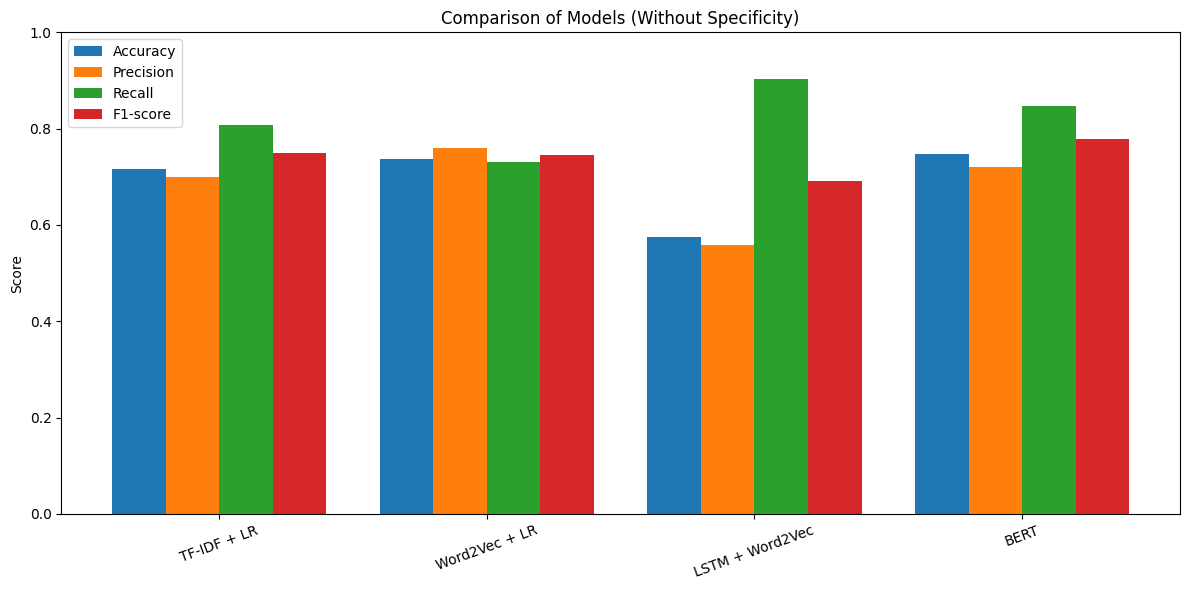

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Dữ liệu của bạn
models = ["TF-IDF + LR", "Word2Vec + LR", "LSTM + Word2Vec", "BERT"]

accuracy = [0.717, 0.737, 0.575, 0.747]
precision = [0.700, 0.760, 0.559, 0.721]
recall = [0.808, 0.731, 0.904, 0.846]
f1 = [0.750, 0.745, 0.691, 0.779]

# Gom nhóm
metrics = [accuracy, precision, recall, f1]
metric_names = ["Accuracy", "Precision", "Recall", "F1-score"]

x = np.arange(len(models))
width = 0.2  # độ rộng cột

plt.figure(figsize=(12, 6))

# Vẽ từng metric
for i, metric in enumerate(metrics):
    plt.bar(x + i * width, metric, width, label=metric_names[i])

plt.xticks(x + width*1.5, models, rotation=20)
plt.ylabel("Score")
plt.title("Comparison of Models (Without Specificity)")
plt.ylim(0, 1.0)
plt.legend()
plt.tight_layout()
plt.show()


In [11]:
import pickle
pickle.dump(tfidf, open("tfidf.pkl", "wb"))
pickle.dump(tfidf, open("model_tfidf.pkl", "wb"))


In [12]:
pickle.dump(w2v, open("w2v_model.pkl", "wb"))
pickle.dump(w2v, open("model_w2v.pkl", "wb"))


NameError: name 'w2v' is not defined